In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import ks_2samp

In [2]:
def gini_coefficient(y_true, y_scores):
    auc = roc_auc_score(y_true, y_scores)
    return 2 * auc - 1

In [3]:
file_path = 'Тестовое задание.xlsx'
df = pd.read_excel(file_path, sheet_name='Лист1')

In [4]:
df.rename(columns={'PD для 2-х': 'PD', 'Статус': 'Status'}, inplace=True)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Дефолт' else 0)


In [5]:
gini = gini_coefficient(df['Status'], df['PD'])


In [6]:
fpr, tpr, _ = roc_curve(df['Status'], df['PD'])
auc_score = roc_auc_score(df['Status'], df['PD'])

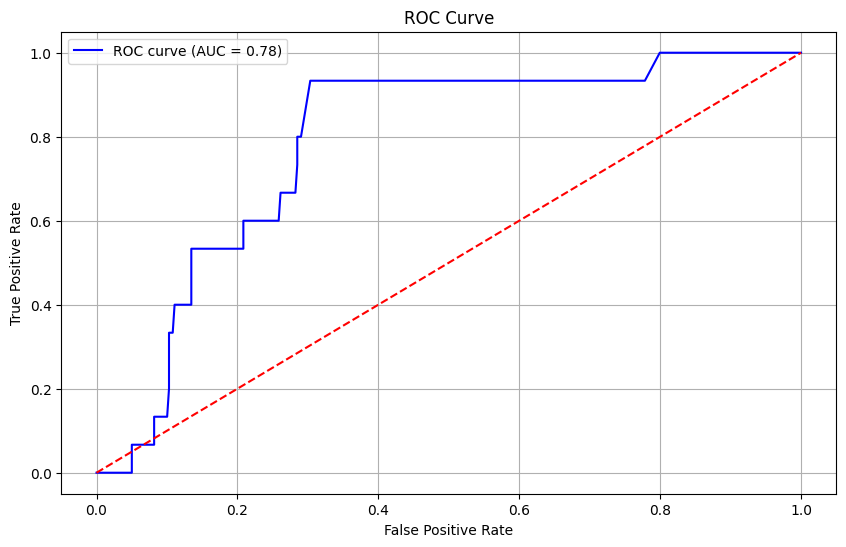

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [8]:
default_group = df[df['Status'] == 1]['PD']
good_group = df[df['Status'] == 0]['PD']
ks_statistic, p_value = ks_2samp(default_group, good_group)


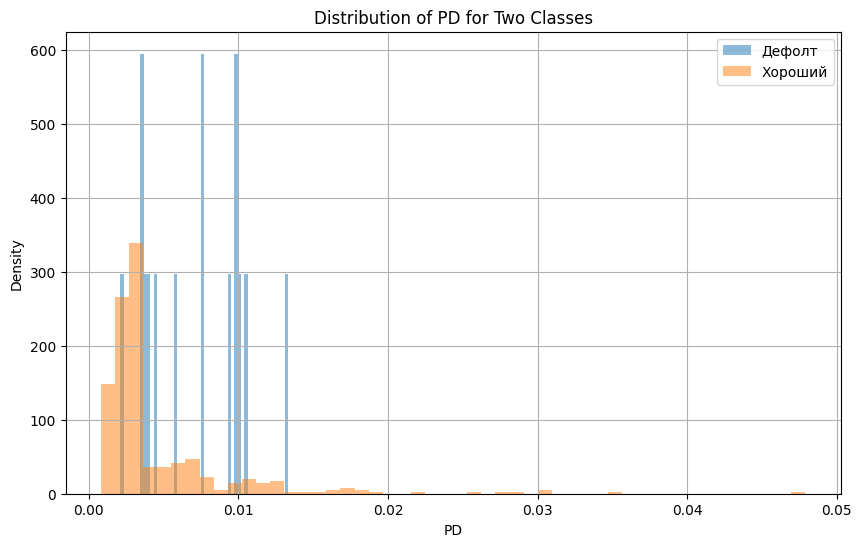

In [9]:

plt.figure(figsize=(10, 6))
plt.hist(default_group, bins=50, alpha=0.5, label='Дефолт', density=True)
plt.hist(good_group, bins=50, alpha=0.5, label='Хороший', density=True)
plt.xlabel('PD')
plt.ylabel('Density')
plt.title('Distribution of PD for Two Classes')
plt.legend()
plt.grid()
plt.show()